In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import normaltest
pd.options.display.max_rows=None

# import data
StockPrices = pd.DataFrame()
market_value_list=[]  
ticker_list = ['BTC.csv','ETH.csv','LINK.csv','LTC.csv','USDT.csv','XRP.csv']
for ticker in ticker_list:
    stock_data = pd.read_csv(ticker,parse_dates=['Data.Data.time'], index_col='Data.Data.time')
    stock_data=stock_data.loc['2020/8/31':'2021/8/8']
    StockPrices[ticker] = stock_data['Data.Data.close']
    market_value_list.append(stock_data['Data.Data.close'].mean()) 
StockPrices.index.name = 'Data.Data.time' 
print(StockPrices.head())
print(StockPrices)

                 BTC.csv  ETH.csv  LINK.csv  LTC.csv  USDT.csv  XRP.csv
Data.Data.time                                                         
2020-08-31      11671.00   434.61     15.62    61.09     1.002   0.2818
2020-09-01      11942.00   476.19     16.11    62.82     1.002   0.2959
2020-09-02      11408.00   439.90     14.83    58.09     1.001   0.2766
2020-09-03      10170.00   382.00     11.88    47.31     1.002   0.2448
2020-09-04      10484.75   386.35     12.43    50.52     1.003   0.2549
                 BTC.csv  ETH.csv  LINK.csv  LTC.csv  USDT.csv  XRP.csv
Data.Data.time                                                         
2020-08-31      11671.00   434.61    15.620    61.09    1.0020   0.2818
2020-09-01      11942.00   476.19    16.110    62.82    1.0020   0.2959
2020-09-02      11408.00   439.90    14.830    58.09    1.0010   0.2766
2020-09-03      10170.00   382.00    11.880    47.31    1.0020   0.2448
2020-09-04      10484.75   386.35    12.430    50.52    1.0030  

In [39]:
# maximum
for ticker in ticker_list:
 print(ticker,'max',StockPrices[ticker].max())

BTC.csv max 63537.0
ETH.csv max 4172.7
LINK.csv max 52.24
LTC.csv max 388.42
USDT.csv max 1.003
XRP.csv max 1.835


In [40]:
# minimum
for ticker in ticker_list:
 print(ticker,'min',StockPrices[ticker].min())

BTC.csv min 10148.0
ETH.csv min 321.26
LINK.csv min 7.69
LTC.csv min 43.06
USDT.csv min 0.9975
XRP.csv min 0.2113


In [41]:
# mean
for ticker in ticker_list:
 print(ticker,'mean',StockPrices[ticker].mean())

BTC.csv mean 33763.28930029155
ETH.csv mean 1516.590524781341
LINK.csv mean 21.473177842565594
LTC.csv mean 144.34498542274048
USDT.csv mean 1.0005670553935855
XRP.csv mean 0.5989935860058306


In [42]:
# standard deviation
for ticker in ticker_list:
 print(ticker,'std',StockPrices[ticker].std())

BTC.csv std 16225.302507573211
ETH.csv std 947.2117910720508
LINK.csv std 9.88800537424738
LTC.csv std 75.43843680697464
USDT.csv std 0.0010393679562044054
XRP.csv std 0.38055300875615244


In [43]:
# quantiles
for ticker in ticker_list:
 s=pd.Series(StockPrices[ticker])
 print (s.quantile([0.25,0.5,0.75]))

0.25    18227.995
0.50    34574.000
0.75    47957.000
Name: BTC.csv, dtype: float64
0.25     548.060
0.50    1650.600
0.75    2193.955
Name: ETH.csv, dtype: float64
0.25    12.640
0.50    19.380
0.75    28.005
Name: LINK.csv, dtype: float64
0.25     76.685
0.50    139.020
0.75    185.730
Name: LTC.csv, dtype: float64
0.25    1.000
0.50    1.000
0.75    1.001
Name: USDT.csv, dtype: float64
0.25    0.26770
0.50    0.52850
0.75    0.73175
Name: XRP.csv, dtype: float64


In [44]:
# skewness and kurtosis
for ticker in ticker_list:
 s=pd.Series(StockPrices[ticker])
 print (ticker,s.skew(),s.kurt())

BTC.csv 0.04046690276520877 -1.2156647227473079
ETH.csv 0.36872041360831725 -0.6695673343399577
LINK.csv 0.7667435608258246 -0.12060940294366862
LTC.csv 0.6434751761408842 0.1450409636429595
USDT.csv 0.2508050079004218 -0.4198337492206785
XRP.csv 1.28125519133324 0.9783679410205082


In [46]:
# Jarque-Bera test
for ticker in ticker_list:
  print(ticker,stats.jarque_bera(StockPrices[ticker]))

BTC.csv Jarque_beraResult(statistic=21.206410549158228, pvalue=2.4836274933104363e-05)
ETH.csv Jarque_beraResult(statistic=14.260037486104645, pvalue=0.0008007043797075841)
LINK.csv Jarque_beraResult(statistic=33.57988269460694, pvalue=5.1076499030244804e-08)
LTC.csv Jarque_beraResult(statistic=23.68869261754001, pvalue=7.1790298044049905e-06)
USDT.csv Jarque_beraResult(statistic=6.221601161365378, pvalue=0.044565262966218544)
XRP.csv Jarque_beraResult(statistic=105.83502047395352, pvalue=0.0)


In [48]:
# returns
StockReturns = StockPrices.pct_change()

SR=StockReturns.loc['2020/9/1':'2021/8/8']
print(SR.head())

for ticker in ticker_list:
  sr=SR[ticker].sort_values(ascending=True)
  p = np.percentile(sr,(1,5,10),interpolation='midpoint') 
  print (ticker,p)

                 BTC.csv   ETH.csv  LINK.csv   LTC.csv  USDT.csv   XRP.csv
Data.Data.time                                                            
2020-09-01      0.023220  0.095672  0.031370  0.028319  0.000000  0.050035
2020-09-02     -0.044716 -0.076209 -0.079454 -0.075294 -0.000998 -0.065225
2020-09-03     -0.108520 -0.131621 -0.198921 -0.185574  0.000999 -0.114967
2020-09-04      0.030949  0.011387  0.046296  0.067850  0.000998  0.041258
2020-09-05     -0.027458 -0.130270 -0.144006 -0.051267  0.000000 -0.065124
BTC.csv [-0.10905248 -0.06140847 -0.04382351]
ETH.csv [-0.13312193 -0.08270664 -0.05665413]
LINK.csv [-0.17219396 -0.10778138 -0.08674141]
LTC.csv [-0.18004942 -0.08243197 -0.05869634]
USDT.csv [-0.00239521 -0.0015     -0.000999  ]
XRP.csv [-0.18965484 -0.10502679 -0.07479023]


In [49]:
# VaR
for ticker in ticker_list:
    StockReturns = StockPrices.pct_change()#.dropna()
    SR=StockReturns.loc['2020/9/1':'2021/8/8']
    mean = StockPrices[ticker].mean()
    std = StockPrices[ticker].std()
    VaR = norm.ppf(0.01, mean, std)
    print (ticker,VaR)

BTC.csv -3982.408693870908
ETH.csv -686.9536116455413
LINK.csv -1.5297624383192066
LTC.csv -31.151061664129287
USDT.csv 0.9981491239583232
XRP.csv -0.28630509687389005


                 BTC.csv   ETH.csv  LINK.csv   LTC.csv  USDT.csv   XRP.csv
Data.Data.time                                                            
2020-09-01      0.023220  0.095672  0.031370  0.028319  0.000000  0.050035
2020-09-02     -0.044716 -0.076209 -0.079454 -0.075294 -0.000998 -0.065225
2020-09-03     -0.108520 -0.131621 -0.198921 -0.185574  0.000999 -0.114967
2020-09-04      0.030949  0.011387  0.046296  0.067850  0.000998  0.041258
2020-09-05     -0.027458 -0.130270 -0.144006 -0.051267  0.000000 -0.065124
           BTC.csv   ETH.csv  LINK.csv   LTC.csv  USDT.csv   XRP.csv
BTC.csv   1.000000  0.731690  0.630903  0.765094 -0.208116  0.464549
ETH.csv   0.731690  1.000000  0.783146  0.785568 -0.126274  0.496098
LINK.csv  0.630903  0.783146  1.000000  0.742243 -0.083681  0.515950
LTC.csv   0.765094  0.785568  0.742243  1.000000 -0.166488  0.571909
USDT.csv -0.208116 -0.126274 -0.083681 -0.166488  1.000000 -0.111357
XRP.csv   0.464549  0.496098  0.515950  0.571909 -0.111357  1

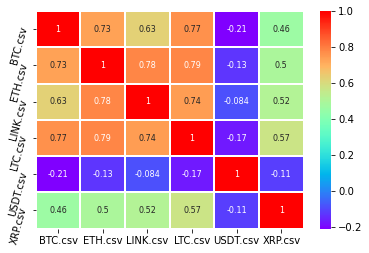

In [50]:
# correlation matrix

#StockReturns=StockReturns.loc['2020/8/30':'2021/8/30']
stock_return = SR.copy()
print (stock_return.head())

correlation_matrix = stock_return.corr()
print(correlation_matrix)


import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow',linewidths=1.0,annot_kws={'size':8})
plt.xticks(rotation=0)
plt.yticks(rotation=75)
plt.show()

                 BTC.csv   ETH.csv  LINK.csv   LTC.csv  USDT.csv   XRP.csv  \
Data.Data.time                                                               
2020-08-31           NaN       NaN       NaN       NaN       NaN       NaN   
2020-09-01      0.023220  0.095672  0.031370  0.028319  0.000000  0.050035   
2020-09-02     -0.044716 -0.076209 -0.079454 -0.075294 -0.000998 -0.065225   
2020-09-03     -0.108520 -0.131621 -0.198921 -0.185574  0.000999 -0.114967   
2020-09-04      0.030949  0.011387  0.046296  0.067850  0.000998  0.041258   

                Portfolio  Portfolio_EW  Portfolio_GMV  Portfolio_MSR  \
Data.Data.time                                                          
2020-08-31            NaN           NaN            NaN            NaN   
2020-09-01       0.032697      0.038103       0.017234       0.058244   
2020-09-02      -0.049539     -0.056983      -0.031224      -0.062832   
2020-09-03      -0.108160     -0.123101      -0.070481      -0.118228   
2020-09-04     

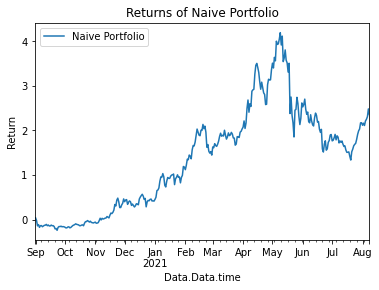

In [74]:
# Naive portfolio
numstocks = 6

portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

StockReturns['Naive Portfolio'] = stock_return.mul(portfolio_weights_ew, axis=1).sum(axis=1)

print(StockReturns.head())

plt.xlabel('Time')
plt.ylabel('Return')
plt.title('Returns of Naive Portfolio')
cumulative_returns_plot(['Naive Portfolio'])


In [56]:
# covariance matrix
cov_mat = stock_return.cov()

cov_mat_annual = cov_mat * 252

print(cov_mat_annual)

portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

           BTC.csv   ETH.csv  LINK.csv   LTC.csv  USDT.csv   XRP.csv
BTC.csv   0.436973  0.443156  0.504605  0.508349 -0.002198  0.448095
ETH.csv   0.443156  0.839466  0.868173  0.723444 -0.001848  0.663255
LINK.csv  0.504605  0.868173  1.463942  0.902667 -0.001617  0.910921
LTC.csv   0.508349  0.723444  0.902667  1.010274 -0.002673  0.838798
USDT.csv -0.002198 -0.001848 -0.001617 -0.002673  0.000255 -0.002596
XRP.csv   0.448095  0.663255  0.910921  0.838798 -0.002596  2.129230
0.6206728333636903


times of simulation= 0
times of simulation= 100
times of simulation= 200
times of simulation= 300
times of simulation= 400
times of simulation= 500
times of simulation= 600
times of simulation= 700
times of simulation= 800
times of simulation= 900


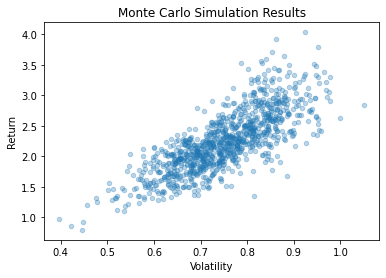

In [63]:
# Monte Carlo simulation
number = 1000

random_p = np.empty((number, 8))

np.random.seed(7)
dn =number/10

for i in range(number):
    if (i%dn==0):
        print ('times of simulation=',i)
 
    random5=np.random.random(6)
    random_weight=random5/np.sum(random5)
 

    mean_return=stock_return.mul(random_weight,axis=1).sum(axis=1).mean()
    annual_return=(1+mean_return)**252-1
 

    random_volatility=np.sqrt(np.dot(random_weight.T,np.dot(cov_mat_annual,random_weight)))
 

    random_p[i][:6]=random_weight
    random_p[i][6]=annual_return
    random_p[i][7]=random_volatility
 

RandomPortfolios=pd.DataFrame(random_p)

RandomPortfolios.columns=[ticker +'_weight' for ticker in ticker_list]+['Return','Volatility']
 

RandomPortfolios.plot('Volatility','Return',kind='scatter',alpha=0.3)
plt.title('Monte Carlo Simulation Results')
plt.show()

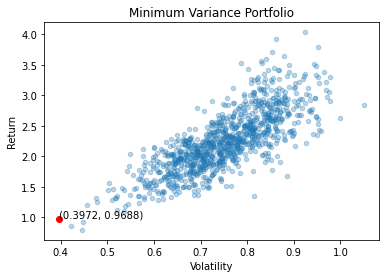

[0.2864892  0.03674347 0.027752   0.12670982 0.47020011 0.0521054 ]


In [64]:
# minimum variance portfolio
min_index = RandomPortfolios.Volatility.idxmin()
 

RandomPortfolios.plot('Volatility', 'Return', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Return']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.title('Minimum Variance Portfolio')
plt.show()


GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])

StockReturns['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)

print(GMV_weights)


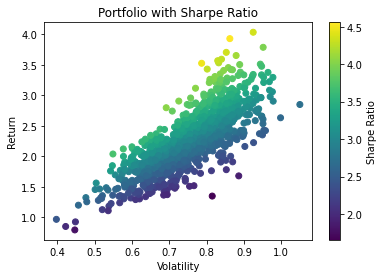

In [71]:
# maximum Sharpe ratio
risk_free = 0

RandomPortfolios['Sharpe'] = (RandomPortfolios.Return - risk_free) / RandomPortfolios.Volatility

plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Return, c=RandomPortfolios.Sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Portfolio with Sharpe Ratio')
plt.show()

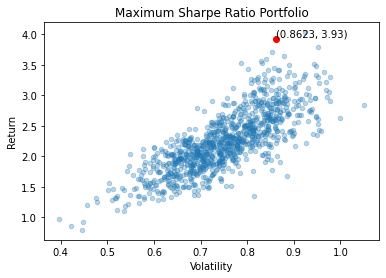

[2.52749847e-01 3.60710488e-01 4.54261556e-05 1.89853056e-02
 2.12214008e-02 3.46287532e-01]


In [68]:
# maximum Sharpe ratio portfolio
max_index = RandomPortfolios.Sharpe.idxmax()

RandomPortfolios.plot('Volatility', 'Return', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Return']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.title('Maximum Sharpe Ratio Portfolio')
plt.show()

MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])

StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)

print(MSR_weights)

